# Project 1 (EDA)

## Objective:
    - The dataset has to be cleaned from incorrect data types, missing values and outliers.

#### Here is a description of the data:

Title: University Performance

#### **Columns:**

`StudentID` - This can remain an `Object` data type. You may ignore it.

`Gender` - Values are Male or Female

`Age` - Values are between 18 - 24 years old

`StudyHours` - Values are between 0 hours - 40 hours

`Attendance` - Values are between 0% - 100%  

`PastFailures` - Ranges for values are (0 - 0 Failiures, 1 - 1-3 Failures, 2 - 4-6 Failures, 3 - 7-10 Failures, 4 - 10+ Failures)

`AssignmentsCompleted` - Values are between 0 - 20

`GroupParticipation` - Values of Low, Medium and High

`ExtracurricularActivities` - Binary values of Yes or No

`FinalExamResult` - Binary values of Pass or Fail


<br>

### Here is a guideline if you need to refer to:

1. import the `pandas` library using
```python
import pandas as pd
```
2. Use the `read_csv()` function from pandas to read the dataset and print it out.
```python
dataset = pd.read_csv('filepath')
```
4. Check for the data types using `.info()` or `.dtypes` and fix the incorrect ones using the `.as_type('nameofdatatype')`
6. Check for missing values using `.info()` function and fix them
7. Check for outliers using the `.boxplot()` graph or IQR method and fix them (you will need to import library matplotlib.pyplot to use boxplot)
```python
import matplotlib.pyplot as plt

# Create box plots for each column
data_dropped.boxplot(figsize=(15, 10), vert=True)  # Set vert=False for horizontal box plots
plt.title('Box Plots of All Columns to Identify Outliers')
plt.show()
```
<br>

**Deadline: 16th (Friday)**

kindly upload the notebook to this drive: https://drive.google.com/drive/folders/1sOzSOuIcwVmHJ3x4PrRSmbZ90rUIufCJ?usp=sharing

In [27]:
import pandas as pd

data = pd.read_csv('university_performance.csv')

In [29]:
# Exploring the dataset 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   StudentID                  100 non-null    object 
 1   Gender                     100 non-null    object 
 2   Age                        100 non-null    int64  
 3   StudyHours                 100 non-null    int64  
 4   Attendance                 100 non-null    int64  
 5   PastFailures               86 non-null     float64
 6   AssignmentsCompleted       100 non-null    int64  
 7   GroupParticipation         100 non-null    object 
 8   ExtracurricularActivities  100 non-null    object 
 9   FinalExamResult            100 non-null    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 7.9+ KB


In [31]:
# Following columns should be of category type: Gender, GroupParticipation, ExtracurricularActivities, FinalExamResult
columns_with_type_object = [col for col in data.columns if data[col].dtype == 'object']
columns_with_type_object.pop(0) # StudentId can remain as an Object

data_copy = data.copy()

# change the column type to category
data_copy[columns_with_type_object] = data_copy[columns_with_type_object].astype('category')

data_copy.dtypes

StudentID                      object
Gender                       category
Age                             int64
StudyHours                      int64
Attendance                      int64
PastFailures                  float64
AssignmentsCompleted            int64
GroupParticipation           category
ExtracurricularActivities    category
FinalExamResult              category
dtype: object

In [33]:
# Handle Missing Values in the PastFailures column
missing_row_count = data_copy['PastFailures'].isnull().sum()
missing_row_count_percentage = (missing_row_count/ len(data_copy['PastFailures']))* 100

print(f'Total Missing Values: {missing_row_count}')
print(f'Percentage Missing Values: {missing_row_count_percentage}')

Total Missing Values: 14
Percentage Missing Values: 14.000000000000002


In [35]:
mode = data_copy['PastFailures'].mode()[0] # Used the mode since it gives a whole number whereas mean and median gives a float 
# and PastFailures column contains only 5 possible int values (0,1,2,3,4)

data_copy['PastFailures'] = data_copy['PastFailures'].fillna(mode)
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   StudentID                  100 non-null    object  
 1   Gender                     100 non-null    category
 2   Age                        100 non-null    int64   
 3   StudyHours                 100 non-null    int64   
 4   Attendance                 100 non-null    int64   
 5   PastFailures               100 non-null    float64 
 6   AssignmentsCompleted       100 non-null    int64   
 7   GroupParticipation         100 non-null    category
 8   ExtracurricularActivities  100 non-null    category
 9   FinalExamResult            100 non-null    category
dtypes: category(4), float64(1), int64(4), object(1)
memory usage: 5.7+ KB


In [39]:
# Testing for missing values
missing_row_count = data_copy['PastFailures'].isnull().sum()
missing_row_count_percentage = (missing_row_count/ len(data_copy['PastFailures']))* 100

print(f'Total Missing Values: {missing_row_count}')
print(f'Percentage Missing Values: {missing_row_count_percentage}')

Total Missing Values: 0
Percentage Missing Values: 0.0


In [41]:
# Converting 'PastFailures' column's type to int
data_copy['PastFailures'] = data_copy['PastFailures'].astype('int')
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   StudentID                  100 non-null    object  
 1   Gender                     100 non-null    category
 2   Age                        100 non-null    int64   
 3   StudyHours                 100 non-null    int64   
 4   Attendance                 100 non-null    int64   
 5   PastFailures               100 non-null    int64   
 6   AssignmentsCompleted       100 non-null    int64   
 7   GroupParticipation         100 non-null    category
 8   ExtracurricularActivities  100 non-null    category
 9   FinalExamResult            100 non-null    category
dtypes: category(4), int64(5), object(1)
memory usage: 5.7+ KB


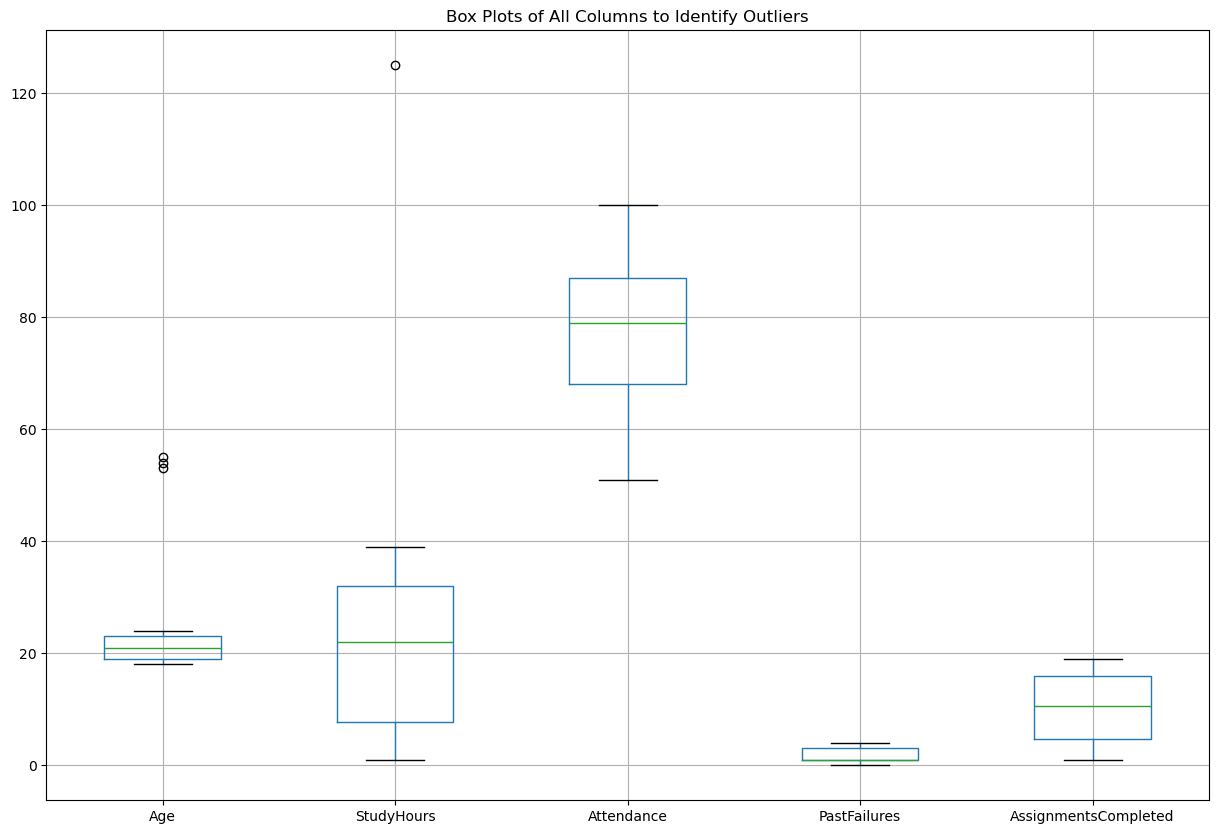

In [43]:
# Identifying outliers
import matplotlib.pyplot as plt

#Create box plots for each column
data_copy.boxplot(figsize=(15, 10), vert=True)  # Set vert=False for horizontal box plots
plt.title('Box Plots of All Columns to Identify Outliers')
plt.show()

In [45]:
# --- Observations from the boxplot ---
# Age column has some outliers. Ages should be between 18 and 24. This data set consists of 55,53,54.
data_copy['Age'].value_counts()

Age
24    21
18    16
22    14
20    13
19    12
21    12
23     9
55     1
53     1
54     1
Name: count, dtype: int64

In [47]:
# --- Observations from the boxplot ---
# StudyHours column has an outlier. Study Hours can be between 0 - 40 hrs but there is a 125
data_copy['StudyHours'].value_counts()

StudyHours
32     8
28     6
2      6
33     5
6      5
1      4
3      4
39     4
11     4
19     3
20     3
37     3
26     3
7      3
16     3
24     3
23     2
17     2
12     2
29     2
9      2
36     2
27     2
5      2
25     2
30     2
22     2
13     2
31     1
18     1
34     1
8      1
38     1
4      1
125    1
15     1
35     1
Name: count, dtype: int64

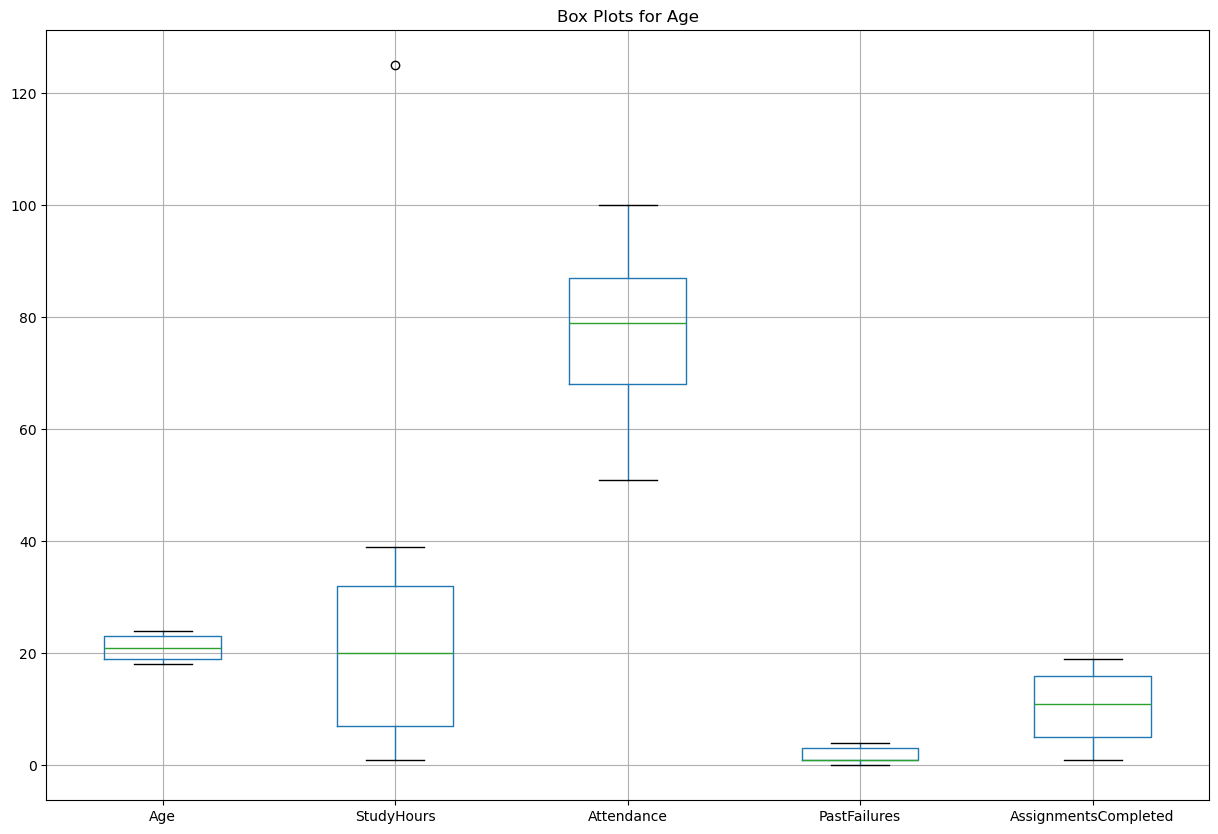

In [49]:
# Removing Age outliers using Box Plot method
filtered_data = data_copy[data_copy['Age'] <= 24]

filtered_data.boxplot(figsize=(15, 10), vert=True)
plt.title('Box Plots for Age')
plt.show()

In [55]:
# Removing StudyHour outlier using InterQuartileRange (IQR method)
# Study Hour -  Values are between 0 hours - 40 hours
Q1 = filtered_data['StudyHours'].quantile(0.25)
Q3 = filtered_data['StudyHours'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR  
upper_bound = Q3 + 1.5 * IQR

outliers = filtered_data[(filtered_data['StudyHours'] < lower_bound) | (filtered_data['StudyHours'] > upper_bound)]

print(Q1, Q3)
print("IQR:", IQR)
print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)
print("Outliers\n", outliers)

7.0 32.0
IQR: 25.0
Lower Bound: -30.5
Upper Bound: 69.5
Outliers
    StudentID  Gender  Age  StudyHours  Attendance  PastFailures  \
44      S045  Female   20         125          97             3   

    AssignmentsCompleted GroupParticipation ExtracurricularActivities  \
44                     4             Medium                        No   

   FinalExamResult  
44            Fail  


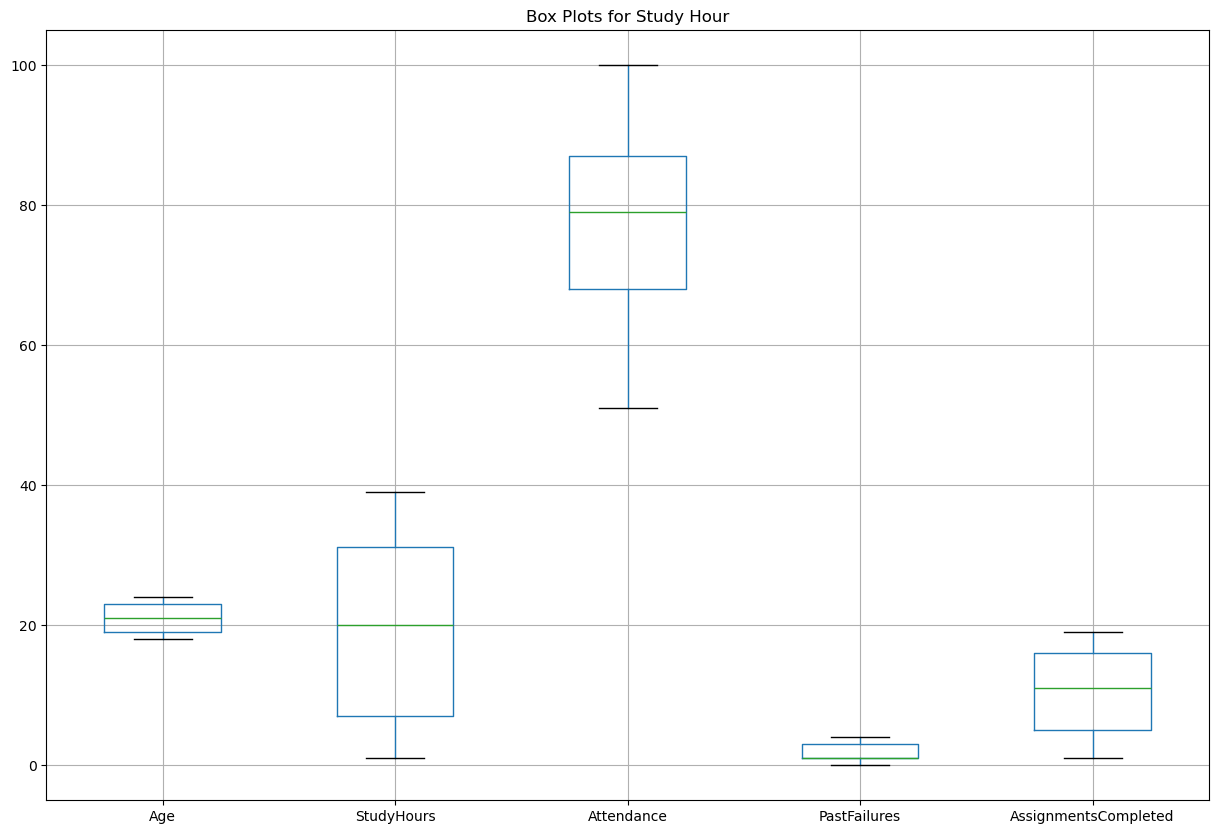

In [57]:
filtered_data1 = filtered_data[(filtered_data['StudyHours'] >= lower_bound) & (filtered_data['StudyHours'] <= upper_bound)]

filtered_data1.boxplot(figsize=(15, 10), vert=True)  # Set vert=False for horizontal box plots
plt.title('Box Plots for Study Hour')
plt.show()